In [13]:
import pandas as pd

df = pd.read_csv('data/all_seasons.csv')
df.head(1)

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.79024,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.1,0.479,0.113,1996-97


In [14]:
mean_height = df['player_height'].mean()
std_height = df['player_height'].std()

print("Mean player height: {:.1f} cm".format(mean_height))
print("Standard deviation of player height: {:.1f} cm".format(std_height))


Mean player height: 200.8 cm
Standard deviation of player height: 9.2 cm


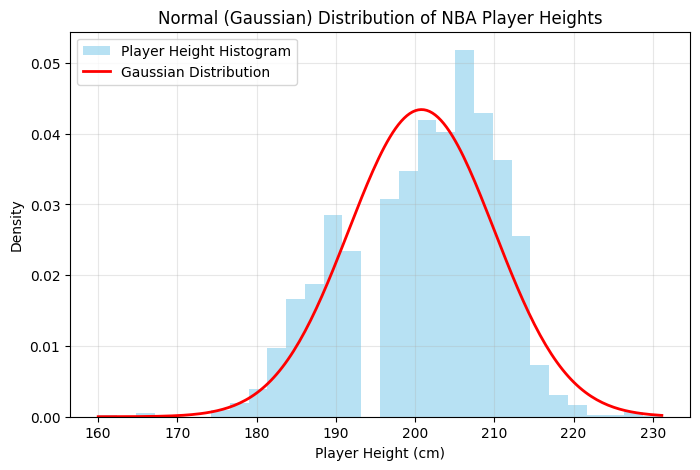

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Use 'df' for player heights
heights = np.linspace(df['player_height'].min(), df['player_height'].max(), 200)
mean = df['player_height'].mean()
std = df['player_height'].std()

# Gaussian/Normal PDF using scipy.stats.norm.pdf()
pdf = norm.pdf(heights, loc=mean, scale=std)


plt.figure(figsize=(8, 5))
plt.hist(df['player_height'], bins=30, density=True, alpha=0.6, color='skyblue', label='Player Height Histogram')
plt.plot(heights, pdf, 'r-', lw=2, label='Gaussian Distribution')

plt.title('Normal (Gaussian) Distribution of NBA Player Heights')
plt.xlabel('Player Height (cm)')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



In [20]:
pdf.shape

(200,)

Probability of height between 191.6cm and 210.0cm (using CDF): 0.6832 (68.32%)


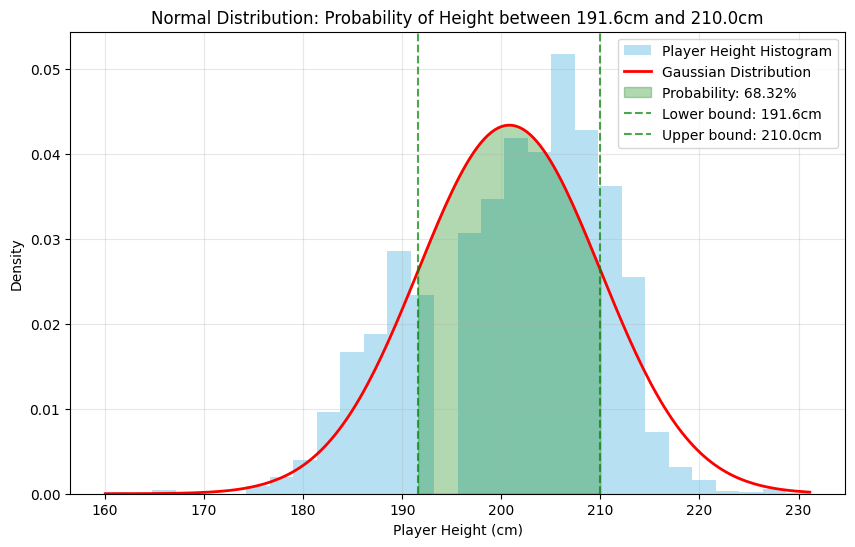

In [30]:
# Calculate probability of a range using CDF (recommended method)
# Example: Probability that a player's height is between (mean - std) and (mean + std)

lower_bound = round(mean - std, 1)
upper_bound = round(mean + std, 1)

# Method 1: Using CDF (Cumulative Distribution Function) - most efficient
prob_cdf = norm.cdf(upper_bound, loc=mean, scale=std) - norm.cdf(lower_bound, loc=mean, scale=std)

print(f"Probability of height between {lower_bound}cm and {upper_bound}cm (using CDF): {prob_cdf:.4f} ({prob_cdf*100:.2f}%)")

# Visualize the range
plt.figure(figsize=(10, 6))
plt.hist(df['player_height'], bins=30, density=True, alpha=0.6, color='skyblue', label='Player Height Histogram')
plt.plot(heights, pdf, 'r-', lw=2, label='Gaussian Distribution')

# Shade the area under the curve for the range
range_heights = np.linspace(lower_bound, upper_bound, 100)
range_pdf = norm.pdf(range_heights, loc=mean, scale=std)
plt.fill_between(range_heights, range_pdf, alpha=0.3, color='green', label=f'Probability: {prob_cdf:.2%}')

plt.axvline(lower_bound, color='green', linestyle='--', alpha=0.7, label=f'Lower bound: {lower_bound}cm')
plt.axvline(upper_bound, color='green', linestyle='--', alpha=0.7, label=f'Upper bound: {upper_bound}cm')

plt.title(f'Normal Distribution: Probability of Height between {lower_bound}cm and {upper_bound}cm')
plt.xlabel('Player Height (cm)')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
